## Constructing co-expression graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_Loading expression data for selected mice._

In [2]:
expression_data_all_features = pd.read_pickle("processed_data/expression_standardized_cleaned.pkl")

In [3]:
expression_data_all_features

strain,Nmt1_10338077_Muscle_CD,Psmb5_10338095_Muscle_CD,Hdac5_10338098_Muscle_CD,Dlg1_10338109_Muscle_CD,Wars_10338116_Muscle_CD,Psph_10338122_Muscle_CD,Copa_10338123_Muscle_CD,Tbl3_10338144_Muscle_CD,Hb1bp3_10338180_Muscle_CD,Aup1_10338221_Muscle_CD,...,AFFX-r2-P1-cre-3_AFFX-r2-P1-cre-5_at_Eye,AFFX-ThrX-3_AFFX-ThrX-3_at_Eye,AFFX-ThrX-5_AFFX-ThrX-5_at_Eye,AFFX-ThrX-M_AFFX-ThrX-M_at_Eye,Tfrc_AFFX-TransRecMur-X57349_3_at_Eye,Tfrc_AFFX-TransRecMur-X57349_5_at_Eye,Tfrc_AFFX-TransRecMur-X57349_M_at_Eye,AFFX-TrpnX-3_AFFX-TrpnX-3_at_Eye,AFFX-TrpnX-5_AFFX-TrpnX-5_at_Eye,AFFX-TrpnX-M_AFFX-TrpnX-M_at_Eye
B6D2F1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.945871,-0.383660,-1.764515,-1.513057,0.618771,1.036264,1.008312,-0.810138,-0.336536,-0.813993
BXD1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.414755,0.599324,0.185117,1.277075,-0.501507,-0.566462,-0.427261,-0.273595,-2.101328,1.004035
BXD100,-0.725161,0.007720,0.376058,0.545516,-1.104466,-0.273818,-0.901318,-0.509151,-0.924874,0.986363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD101,-1.317918,1.462562,0.845329,0.515211,-1.058281,-0.056781,-0.942842,-0.953912,0.496976,0.299762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BXD102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BXD98,2.220295,-1.073020,0.193564,0.252363,1.052343,-1.433933,-0.207268,1.668022,0.450924,-0.547979,...,-0.644823,-0.666892,0.167393,-0.138813,-0.566410,-0.740733,-0.645876,-0.672170,-1.854257,0.509659
BXD99,-1.305697,0.207241,1.453644,0.255455,-0.748846,0.607248,-0.625478,1.101311,-1.224210,-0.611035,...,-0.056785,0.899217,-0.612460,-0.721825,-0.826021,-0.757874,0.082841,-0.610851,1.463552,1.673835
C57BL.6J,-1.929009,-0.557591,-0.353919,-0.014195,0.050143,-1.273739,-0.064899,-0.132540,-0.677345,2.506693,...,1.535355,-0.017124,-1.285969,-2.491685,0.734467,0.979126,0.822489,-1.086075,-0.830678,-0.112298
D2B6F1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.563092,2.631934,0.185117,-2.366754,0.130589,0.744860,0.724112,-0.518872,0.192902,-1.196735


_As we can observe we have 86 strains (mice) and 1,201,231 expression features._

_Loading the relevant features for our task._

In [4]:
selected_features_df = pd.read_pickle("processed_data/selected_features.pkl")

In [5]:
selected_features = list(selected_features_df.columns)

In [6]:
print('The total number of selected features is {f}'.format(f = len(selected_features)))

The total number of selected features is 799


_We now select the relevant features for all the available strains._

In [7]:
expression_data = expression_data_all_features[selected_features].T

In [8]:
expression_data.index.name = 'snp'

In [9]:
expression_data

,B6D2F1,BXD1,BXD100,BXD101,BXD102,BXD11,BXD12,BXD13,BXD14,BXD15,...,BXD9,BXD90,BXD93,BXD94,BXD95,BXD98,BXD99,C57BL.6J,D2B6F1,DBA.2J
snp,,,,,,,,,,,,,,,,,,,,,
Dohh_1436402_at_A_Brain_INIA,0.618987,0.535750,NaN,NaN,NaN,0.068455,1.048721,0.345506,-0.817460,-0.515665,...,NaN,-0.183852,NaN,NaN,NaN,NaN,NaN,0.036653,-0.739577,0.589700
_TC1900000083.mm.1_ScWAT_HFD,NaN,NaN,1.456326,-0.172749,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.405474,NaN,NaN,-0.244974,-1.280198,0.288689,-3.362685,NaN,1.151376
1700010C24Rik_1460477_at_B_Brain_INIA,0.317242,0.104278,NaN,NaN,NaN,0.740807,1.711438,0.667642,-1.741298,0.534012,...,NaN,1.267666,NaN,NaN,NaN,NaN,NaN,1.208744,0.192147,-0.175888
B230319C09Rik_ILM100610086_Bone_Femur,NaN,0.553531,NaN,NaN,NaN,-0.932458,0.281807,-0.312588,0.646936,-0.389011,...,-0.788105,NaN,NaN,NaN,NaN,NaN,NaN,0.680901,NaN,-0.575821
Atp1b1_1437157_at_Eye,1.151538,-0.113621,NaN,NaN,NaN,-1.959041,2.007660,-2.054166,0.694939,0.466640,...,-0.769982,0.609327,NaN,NaN,NaN,0.200290,-0.712907,0.847139,1.199100,0.580789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm11786_TC0400000007.mm.1_ScWAT_CD,NaN,NaN,-1.444342,0.576870,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.832549,NaN,NaN,1.225488,0.474598,-0.817255,0.549957,NaN,0.081660
Olfr223_ILM6350097_Bone_Femur,NaN,-0.475954,NaN,NaN,NaN,0.119570,-1.384129,0.968192,0.082350,-1.190584,...,2.047580,NaN,NaN,NaN,NaN,NaN,NaN,0.506661,NaN,-0.498286
Fbp3_ILM6840577_Bone_Femur,NaN,-0.400647,NaN,NaN,NaN,-1.641554,-0.591556,1.126622,-1.695247,-0.317125,...,-0.173943,NaN,NaN,NaN,NaN,NaN,NaN,-0.687010,NaN,0.434578


In [10]:
pd.to_pickle(expression_data, "processed_data/expression_data.pkl")

_In order to build our co-expression graph, given two SNPs X and Y:_
- _we first obtain the vectors corresponding to the expression for all strains for those SNPS._
- _we then compute the number of common strains for these two SNPs X and Y, call it **n**._
- _we then compute the euclidian distance **e** between the non NaN values of X and Y._
- _we obtain the distance **d** between X and Y by computing d = e / n._

_We will first visualize the distribution of number of common mice measurement per pair of SNPs. With this distribution we can then set the distance to infinity between X and Y if they don't share at least n common measurements._

In [11]:
def compute_common_mice_per_snp_pair(expression_data):
    
    rows = []
    
    for index_i, row_i in expression_data.iterrows():
        
        new_row = {}
    
        for index_j, row_j in expression_data.iterrows():

                u = row_i.values
                v = row_j.values
                u_valid_indexes = np.argwhere(~np.isnan(u))
                v_valid_indexes = np.argwhere(~np.isnan(v))
                valid_indexes = np.intersect1d(u_valid_indexes, v_valid_indexes)
                n = len(valid_indexes)
                
                new_row[index_j] = n
                
        rows.append(new_row)
    
    return pd.DataFrame(rows, index = expression_data.index)

In [12]:
count = compute_common_mice_per_snp_pair(expression_data)
count

,Dohh_1436402_at_A_Brain_INIA,_TC1900000083.mm.1_ScWAT_HFD,1700010C24Rik_1460477_at_B_Brain_INIA,B230319C09Rik_ILM100610086_Bone_Femur,Atp1b1_1437157_at_Eye,4933403G14Rik_10576559_Amygdala_Male,2900041M22Rik_1444801_at_B_Brain_INIA,Pvrl3_1448673_at_A_Brain_INIA,Pgrmc1_ILM4150692_Bone_Femur,Dera_1424047_at_A_Brain_INIA,...,LOC386195_ILM102480601_Bone_Femur,2210039B01Rik_TC1200000645.mm.1_ScWAT_CD,Snx7_ILM6980600_Bone_Femur,Stx6_1460004_x_at_A_Brain_INIA,Nars2_1435707_at_B_Brain_INIA,Gm11786_TC0400000007.mm.1_ScWAT_CD,Olfr223_ILM6350097_Bone_Femur,Fbp3_ILM6840577_Bone_Femur,Zfp406_1443775_x_at_B_Brain_INIA,4930511H11Rik_1445187_at_B_Brain_INIA
snp,,,,,,,,,,,,,,,,,,,,,
Dohh_1436402_at_A_Brain_INIA,43,12,43,26,43,31,43,43,26,43,...,26,13,26,43,43,13,26,26,43,43
_TC1900000083.mm.1_ScWAT_HFD,12,38,12,2,31,31,12,12,2,12,...,2,38,2,12,12,38,2,2,12,12
1700010C24Rik_1460477_at_B_Brain_INIA,43,12,43,26,43,31,43,43,26,43,...,26,13,26,43,43,13,26,26,43,43
B230319C09Rik_ILM100610086_Bone_Femur,26,2,26,32,31,20,26,26,32,26,...,32,2,32,26,26,2,32,32,26,26
Atp1b1_1437157_at_Eye,43,31,43,31,72,49,43,43,31,43,...,31,34,31,43,43,34,31,31,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm11786_TC0400000007.mm.1_ScWAT_CD,13,38,13,2,34,33,13,13,2,13,...,2,41,2,13,13,41,2,2,13,13
Olfr223_ILM6350097_Bone_Femur,26,2,26,32,31,20,26,26,32,26,...,32,2,32,26,26,2,32,32,26,26
Fbp3_ILM6840577_Bone_Femur,26,2,26,32,31,20,26,26,32,26,...,32,2,32,26,26,2,32,32,26,26


_We then apply a mask in order to count each pair once._

In [13]:
mask = np.zeros_like(count.values, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

In [14]:
common_mice_per_pair = count.values[mask]

In [15]:
common_mice_per_pair

array([43, 12, 38, ..., 26, 43, 43])

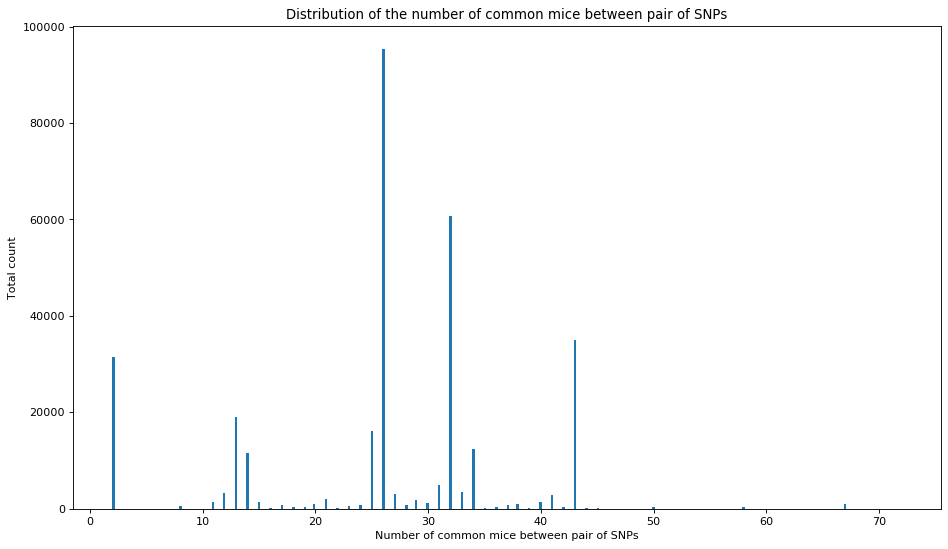

In [16]:
plt.figure(figsize = (14, 8), dpi = 80)
plt.hist(common_mice_per_pair, bins='auto')
plt.title('Distribution of the number of common mice between pair of SNPs')
plt.xlabel('Number of common mice between pair of SNPs')
plt.ylabel('Total count')
plt.show()

We decide to consider similarity only between SNPs for which we have expression data from at least 10 mice in common.

In [17]:
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import pairwise_distances, pairwise

_Define the distance function that we are using to build the graph._

In [18]:
def distance(u, v):
    # Obtain common indexes that are non NaN for both u and v
    u_valid_indexes = np.argwhere(~np.isnan(u))
    v_valid_indexes = np.argwhere(~np.isnan(v))
    valid_indexes = np.intersect1d(u_valid_indexes, v_valid_indexes)
    
    
    
    # Obtain valid common vectors and length of these vectors
    u_valid = u[valid_indexes]
    v_valid = v[valid_indexes]
    n = len(valid_indexes)
    # threshold on the number of mice
    if n < 10:
        distance = 1*n
    else:
        distance = np.linalg.norm(u_valid-v_valid)
    return distance / n 

In [19]:
distances = pd.DataFrame(
    squareform(pdist(expression_data,
                    distance)),
    columns = expression_data.index,
    index = expression_data.index
)

In [20]:
distances_matrix = distances.values
print('Matrix containing distances has shape {s}'.format(s = distances_matrix.shape))

Matrix containing distances has shape (799, 799)


In [21]:
def epsilon_similarity_graph(distances: np.ndarray, sigma=1, epsilon=0):
    """ distances (n x n): matrix containing the distance between all our data points.
        sigma (float): width of the kernel
        epsilon (float): threshold
        Return:
        adjacency (n x n ndarray): adjacency matrix of the graph.
    """
    W = np.exp(- distances / (2 * sigma ** 2)) # Apply the kernel to the squared distances
    W[W<epsilon] = 0 # Cut off the values below epsilon
    np.fill_diagonal(W, 0) # Remove the connections on the diagonal
    return W

In order to find a good value for sigma, we first compute the median $L_2$ distance between data points, which will be our first estimate for sigma.

In [22]:
median_dist = np.median(distances_matrix)
median_dist

0.2573980719095206

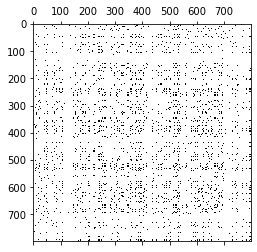

In [23]:
c = 0.7 # c is linked to the sparsity of the graph
adjacency = epsilon_similarity_graph(distances_matrix, sigma=median_dist*c, epsilon=0.1)
plt.spy(adjacency)
plt.show()

We tuned parameters to have a sparse graph with dominating connected component. Further we operate only on the connected component. The remaining SNP expressions are inferred as previously: they are set to the mean.

In [24]:
import networkx as nx
G = nx.from_numpy_matrix(adjacency)

In [25]:
nx.is_connected(G)
comp = nx.connected_components(G)

In [26]:
components = [len(list(com)) for com in comp]

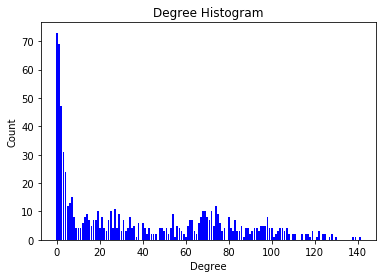

In [27]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

We decide to use only the biggest subgraph since the disconnected components are small: each having only a few nodes that are likely far apart from the others according to our distance metric.

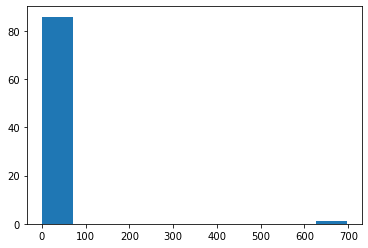

In [28]:
subgraphs = list(nx.connected_component_subgraphs(G))
graph_nodes = [len(graph.degree()) for graph in subgraphs]
biggest_subgraph_id = graph_nodes.index(max(graph_nodes))
plt.hist(graph_nodes);

In [29]:
subgraph = subgraphs[biggest_subgraph_id]

In [30]:
np.save("processed_data/coexpression_adjacency.npy", nx.to_numpy_matrix(subgraph))

In [31]:
np.save("processed_data/coexpression_node_indices.npy", np.array(list(subgraph.nodes)))